<a href="https://colab.research.google.com/github/bionca22/Womakers_dataanalytics_semana11/blob/main/desafio_individual_semana_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.  Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado**


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [43]:
df = pd.read_csv("populacao_brasileira.csv")
df.head(10)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M
5,5,AM,38,Fundamental,Avançado,4441.57,F
6,6,DF,56,Médio,Intermediário,528.36,F
7,7,DF,36,Superior,Avançado,2203.10,F
8,8,PI,40,Fundamental,Básico,3577.07,F
9,9,AP,28,Superior,Avançado,2796.95,M


In [44]:
amostra = len(df)

In [45]:
#busca e contagem de pessos que tem inglés avançado
falantes_avancados = df[(df["nível de proficiência em inglês"] == "Avançado")]
fa = len(falantes_avancados)

pfe = fa/amostra
print(f"a probrabilidade de haver um falando de inglês retirado aleatóriamente é de {pfe}")
co = 1- pfe
print(f"a probabilidade complementar desse evento é {co}")

a probrabilidade de haver um falando de inglês retirado aleatóriamente é de 0.344
a probabilidade complementar desse evento é 0.656


## **2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?**

In [46]:
#busca e contágem da amostra
amostra_amazonas = len(df[(df["renda"] > 5000)])
renda_sup5 = df[(df["estado"]== "PA") | (df["estado"] == "AL")]
renda_sup5 = len(renda_sup5)

#probabilidade renda superior a 5 mil reais
p_renda_sup5 = renda_sup5/amostra_amazonas
print(f"a probabilidade de uma pessoa escolhida aleatóriamente em Alagoas ou Pará ter uma renda maior que 5mil é de {p_renda_sup5 :.2f}")

a probabilidade de uma pessoa escolhida aleatóriamente em Alagoas ou Pará ter uma renda maior que 5mil é de 2.47


## **3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?**

In [47]:
#busca da amostra
amostra_amazonas = len(df[(df["estado"] == "AM")])
am_superior = df[(df["estado"]== "AM") & ((df["escolaridade"] == "Superior") | (df["escolaridade"] == "Pós-graduação"))]
#contagem da amostra
amostra_am_superior = len(am_superior)

#probabilidade de ensino pessoas com superior na cidade de amazonas
amostra_superior_completo = amostra_am_superior/amostra_amazonas
print(f"a probabilidade de uma pessoa escolhida ao acaso ter o ensino superior completo em AM é {amostra_superior_completo :.2f}")

#probabilidade complementar de pessoas com superior na cidade de amazonas
am_superior_completo_complementar = 1 - amostra_superior_completo

#a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo
pessoa5 = (am_superior_completo_complementar**4) * amostra_superior_completo

print(f"a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo é de {pessoa5 :.2f}")

a probabilidade de uma pessoa escolhida ao acaso ter o ensino superior completo em AM é 0.55
a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo é de 0.02


## 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?**

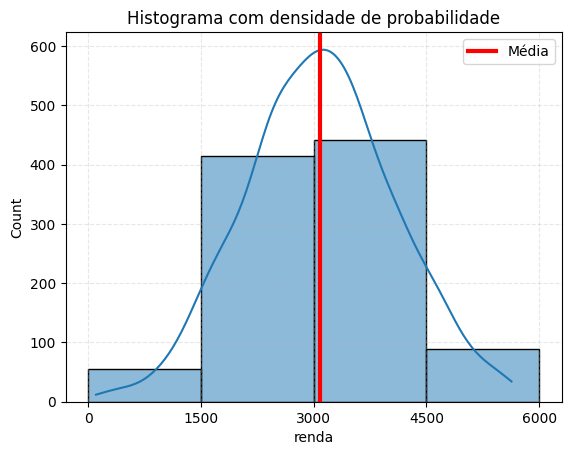

In [48]:
sns.histplot(data = df['renda'], kde = True, bins = [0,1500,3000,4500,6000])
plt.xticks([0,1500,3000,4500,6000])
plt.axvline(df['renda'].mean(), color='red', label='Média', linewidth=3)
plt.legend()
plt.title("Histograma com densidade de probabilidade")
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()


## **5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.**

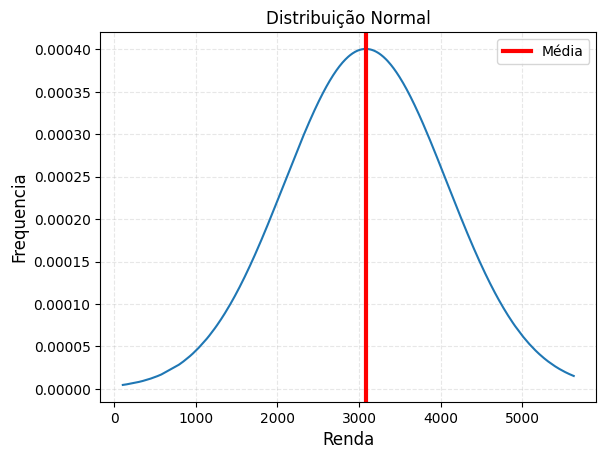

In [49]:
df_mean = np.mean(df["renda"])
df_std = np.std(df["renda"])

# probability density function (PDF)
pdf = stats.norm.pdf(df["renda"].sort_values(), df_mean, df_std)

plt.plot(df["renda"].sort_values(), pdf)
plt.xlabel("Renda", size=12)
plt.ylabel("Frequencia", size=12)
plt.axvline(df['renda'].mean(), color='red', label='Média', linewidth=3)
plt.legend()
plt.title("Distribuição Normal")
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

## **6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?**

In [50]:
populacao = len(df)

dfPos = df[df['escolaridade'] == 'Pós-graduação']
qtdPos = len(dfPos)
print(qtdPos) # 253 pessoas com pós graduação

probPos = qtdPos / populacao # 253/1000
print(probPos) # Probabiliade de ter pós graduação 0.253

253
0.253


Probabilidade 243000 em um milhão (Binomial): 1.1104854289794913e-119


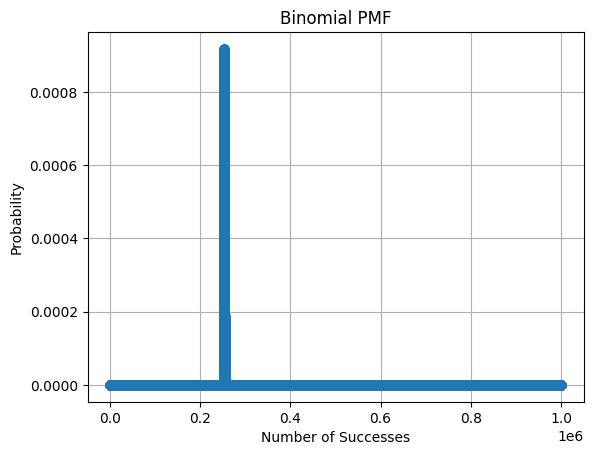

In [51]:
k = 243000
n = 1000000
p = probPos

probMilhao = stats.binom.pmf(k , n, p)
print("Probabilidade 243000 em um milhão (Binomial):", probMilhao)

x_values = np.arange(0, n+1)
pmf_values = stats.binom.pmf(x_values , n, p)

plt.plot(x_values, pmf_values, marker='o', linestyle='-')
plt.title('Binomial PMF')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

## **7.Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade**

In [52]:
amostra7 = len(df['escolaridade'])
escol = df.groupby('escolaridade').size().reset_index(name='Qtd').sort_values('escolaridade', ascending=True)
print(escol)

    escolaridade  Qtd
0    Fundamental  266
1          Médio  238
2  Pós-graduação  253
3       Superior  243


In [53]:
pro = df['escolaridade'].value_counts(normalize=True)
print(pro)

escolaridade
Fundamental      0.266
Pós-graduação    0.253
Superior         0.243
Médio            0.238
Name: proportion, dtype: float64


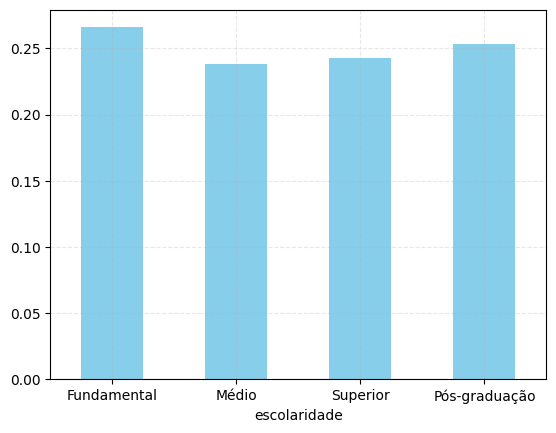

In [54]:
ord_escol = ["Fundamental", "Médio", "Superior", "Pós-graduação"]
reord_escol = pro.reindex(ord_escol)

reord_escol.plot(kind = "bar", color="skyblue")
plt.grid(True, alpha=0.3, linestyle="--")
plt.xticks(rotation = 0)
plt.show()

**Densidade acumulada discreta para cada nível de escolaridade**

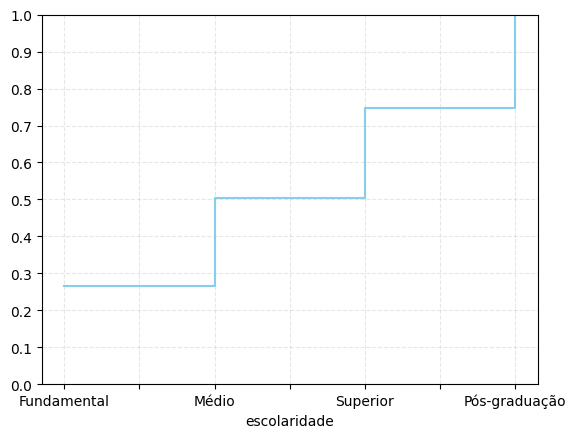

escolaridade
Fundamental      0.266
Médio            0.504
Superior         0.747
Pós-graduação    1.000
Name: proportion, dtype: float64


In [55]:
densidade_acumulada = reord_escol.cumsum()

y_value = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

densidade_acumulada.plot(drawstyle = "steps-post", color = "skyblue")
plt.xticks(rotation = 0)
plt.yticks(y_value)
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

print(densidade_acumulada)

## **8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?**

In [56]:
n = populacao
proficiencia = df[df["nível de proficiência em inglês"] == "Intermediário"]
prob_intermediario = len(proficiencia) / n
Z = 0.95


margem_erro = Z * np.sqrt((prob_intermediario * (1 - prob_intermediario))/ n)
print(margem_erro )


0.014115062787674732


## **9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?**

In [59]:
media_renda = df['renda'].mean()
media_renda1000 = df[df['renda'] > media_renda + 1000]
prob_renda1000 =  len(media_renda1000) / n

binom_use = stats.binom.pmf(60, n, prob_renda1000)
print(binom_use)

1.099520565163774e-22


## **10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?**

In [58]:
sudeste = ['ES','MG','RJ','SP']

sudeste_todos = df[(df['estado'].isin(sudeste))]
prob_sudeste = len(sudeste_todos) / n

fundam_todos = df[(df['escolaridade'] == 'Fundamental')]
prob_fundam = len(fundam_todos) / n

renda_todos = df[(df['renda'] > 2000)]
prob_renda = len(renda_todos) / n

homem_todos = df[(df['sexo'] == 'M')]
prob_homem = len(homem_todos) / n

prob_final = prob_sudeste * prob_fundam * prob_renda * prob_homem
print(prob_final)


0.017414252855999998
